<a href="https://colab.research.google.com/github/tcathy2009/AI/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab介紹

Google Colab是一個基於 Jupyter Notebook 的免費CPU虛擬機，透過瀏覽器即可編寫程式，當離開瀏覽器操作畫面，虛擬機上的操作資料都被清空，所以使用者不需要擔心操作不慎搞壞機器。除了資料存至雲端虛擬機上之外，還可以連接Google Drive雲端硬碟，將訓練完成的AI模型或資料科學處理的資料進行儲存，而Google Colab擁有以下幾個特點：
不需任何設定：瀏覽器開起Google Colab，連線完成即建立玩虛擬機，就可以使用Google Colab的功能。
免費使用 GPU或TPU：Colab中可選用的GPU通常包括Nvidia K80，T4，P4和P100，但使用者不能選擇使用哪種類型的GPU，由於免費使用的關係，Colab無法保證資源，會依據時間和使用者有浮動，筆記本最長可執行12小時；如果一定需要使用GPU，可以選擇升級為付費版本Colab Pro，每月支付9美金，優先存取更快速的 GPU 和 TPU。
共用功能：Colab筆記本是存在Google Drive，方便管理ipynb檔案，也可以將程式檔案ipynb下載分享給其他人使用。
開啟GitHub筆記本：透過開啟筆記本功能，可以點選GitHub選項，貼上你從GitHub看到的ipynb檔案網址，就可以在Google Colab開啟檔案或複製至自身的Google Drive。


# Hello

在colab註冊完帳號之後, 可以看到說明非常詳細的歡迎頁面,
這個歡迎頁面本身就是一個Jupiter notebook, 你可以直接在上面編輯或執行程式.
你也可以直接在"檔案>>新增筆記本", 會直接開起一個新的notebook, 同時在你的google drive可以看到這個新增的檔案


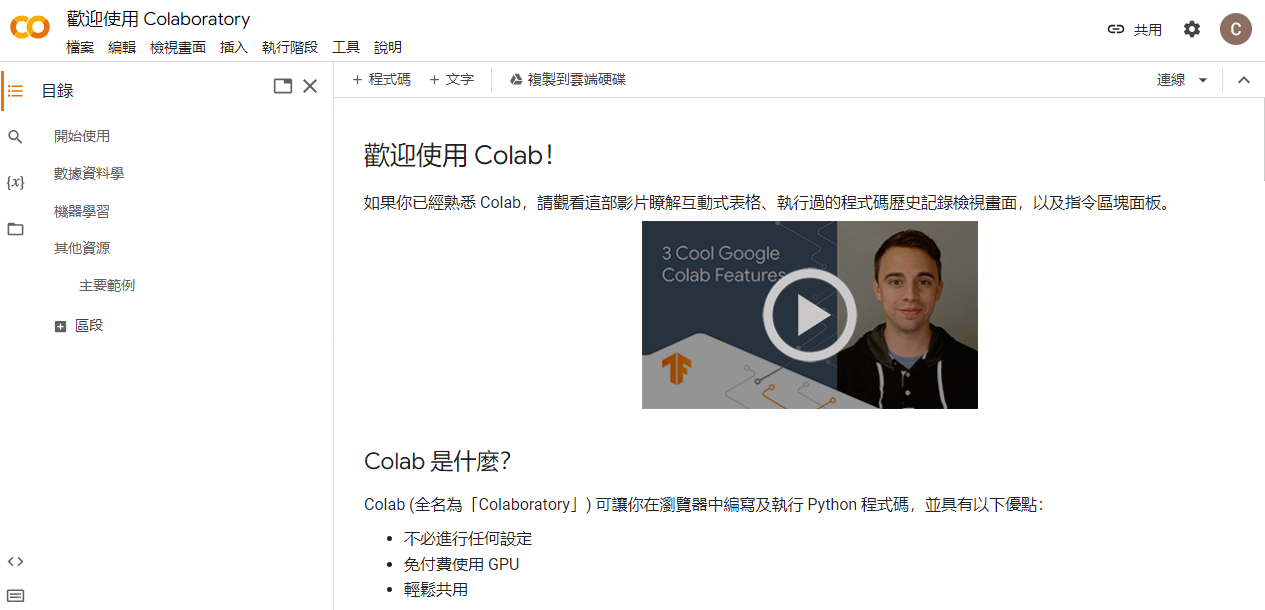

In [ ]:
print('Hello Colab!!')

Hello Colab!!


In [ ]:
name = input("請問大名?")
print('Hello '+ name)

請問大名?Cathy
Hello Cathy


**可在文字區塊放筆記**::

---



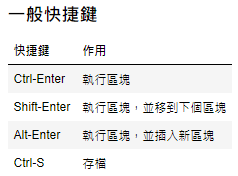

# titanic tourtal

Demo: 直接上傳data file到content/data folder使用
1. 在content建立data folder
2. upload file

In [1]:
import numpy as np
import pandas as pd

# print data file
import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/data/train.csv
/content/data/gender_submission.csv
/content/data/test.csv


In [4]:
train_data = pd.read_csv("/content/data/train.csv")
train_data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test_data = pd.read_csv("/content/data/test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


左列的變數清單可以即時觀看變數內容

In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [9]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [12]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# mount google drive

Since a Colab notebook is hosted on Google’s cloud servers, there’s no direct access to files on your local drive (unlike a notebook hosted on your machine) or any other environment by default.

However, Colab provides various options to connect to almost any data source you can imagine. Let us see how.

output file以寫入content folder, 不會主動將file存到雲端硬碟
1. 可點選file, 下載檔案到本機
2. 可透過mount google drive存檔

In [13]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
# 出現提示欄進行授權, 完成帳戶授權後, 可在content看到gdrive以mount到google drive

Mounted at /content/gdrive


In [14]:
output.to_csv('/content/gdrive/MyDrive/titanic_output.csv', index=False)
# 會將csv檔存放在google drive根目錄


In [17]:
# 從google drive讀檔
df_verify = pd.read_csv('/content/gdrive/MyDrive/titanic_output.csv')
print(df_verify)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [18]:
# save model
import joblib

joblib.dump(model, "/content/gdrive/MyDrive/model/rf.joblib")

['/content/gdrive/MyDrive/model/rf.joblib']

In [19]:
# 看看model file
!ls /content/gdrive/MyDrive/model

rf.joblib


In [20]:
# load model
loaded_rf = joblib.load("/content/gdrive/MyDrive/model/rf.joblib")
predictions2 = loaded_rf.predict(X_test)
predictions2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

前面使用上傳的data file, 也可改成直接讀取google drive的檔案

In [21]:
test_data = pd.read_csv("/content/gdrive/MyDrive/data/test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


取用git上的data file

In [2]:
# 透過Linux指令取得github的檔案, 會放在content folder下
!git clone https://github.com/tcathy2009/AI.git

Cloning into 'AI'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 33 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (33/33), 51.80 KiB | 5.76 MiB/s, done.
Resolving deltas: 100% (10/10), done.


直接使用github的data file
1. 在github點選file, view Raw, copy the URL of the raw file,
2. use this URL as the location of your file.
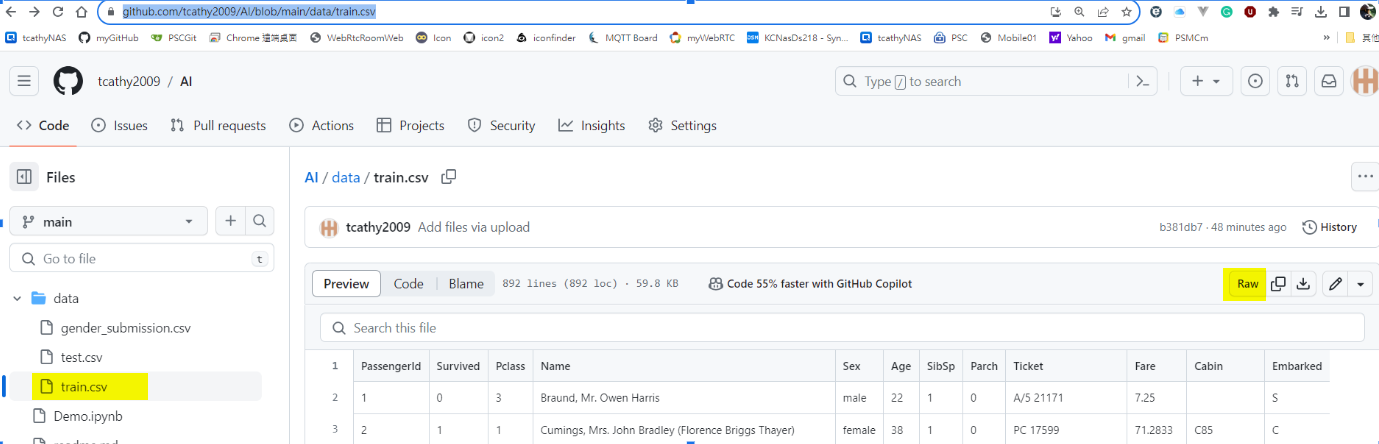
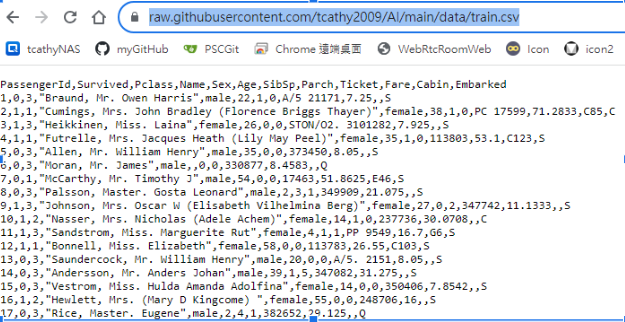

In [4]:
import pandas as pd
train_data = pd.read_csv('https://raw.githubusercontent.com/tcathy2009/AI/main/data/train.csv')
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


變更執行階段: CPU/GPU, 查看目前GPU使用的型號

# 變更執行階段: CPU/GPU


功能列: 執行階段>>變更執行階段

CPU:
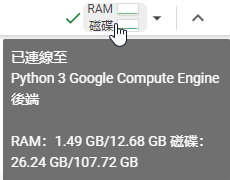
 GPU:
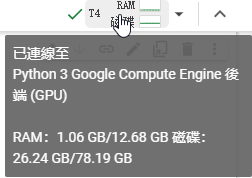

In [1]:
# 查看目前GPU使用的型號
! nvidia-smi

Sun Aug 27 16:32:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

將程式檔案commit到github
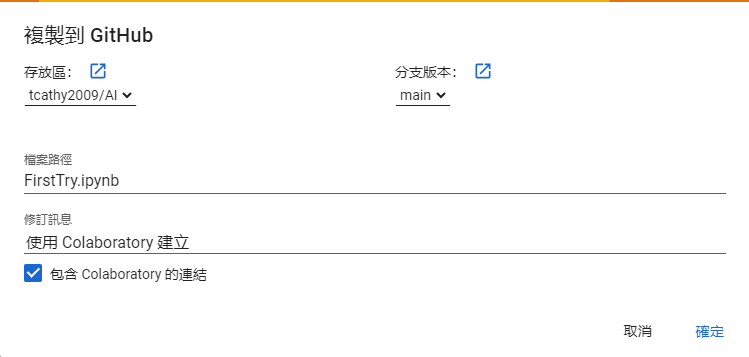
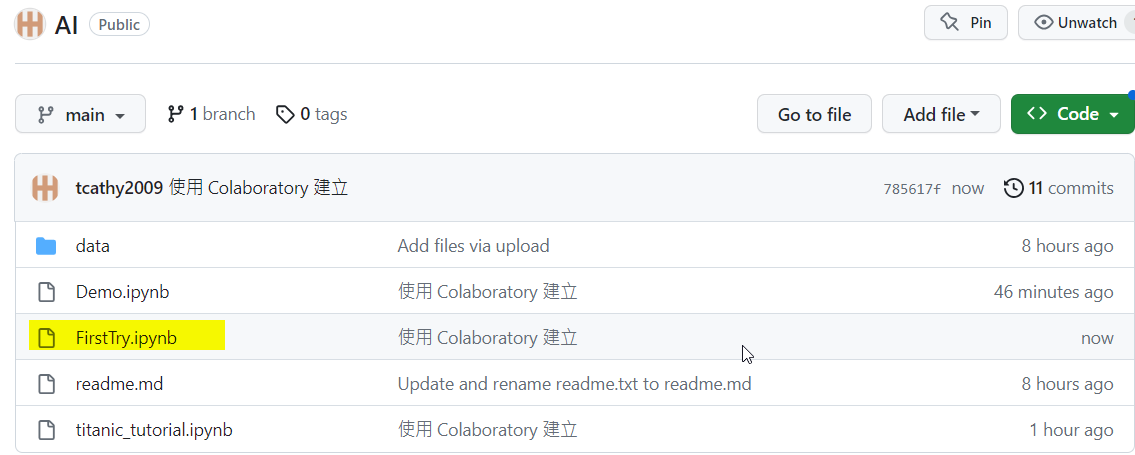